# Integrated Project 1 

## Project overview

This project will include an investigation on video games sold around the world, from different genres, platforms, rating, etc'.
 
The goal of this projct is to identify patterns that determine whether a game succeeds or not, which will assist in spoting potential big winners and plan advertising campaigns in the company.

This project will include a dataset from the Ice online store data base as well as open source of historical data. 

<b> Analysis outline: </b>

Assessed the data, and made decisions about dealing with missing values.

Calculated the total revanue from the different regions we have. 

Performed a vast analysis on the data, concentrated on more relevant years and top platforms in the market. 

Performed EDA, plotted histograms and calculated the variances.
Performed hypothesis testing to learn about the differences in revanues for different groups of clients.

Made recommendations backed by statistics for the popular platforms and genres in differnet regions according the market sales.

## Data Overview

In [1]:
!pip install sidetable

Defaulting to user installation because normal site-packages is not writeable


In [2]:
import pandas as pd
import numpy as np
import sidetable
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

/opt/conda/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
#reading the data file
try:
    games = pd.read_csv('/datasets/games.csv')
except:
    print("An error with file reading has occurred")

In [4]:
#looking at the data structure
display(games.head())

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [5]:
#looking at the data general information
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


We have a data set of 16715 rows. We can see that we have missing values in columns: Name, Year_of_Release, Genre, Critic_Score, User_Score and Rating. 

In [6]:
#looking at the missing values using side table
games.stb.missing(style = True)

,missing,total,percent
Critic_Score,"8,578","16,715",51.32%
Rating,"6,766","16,715",40.48%
User_Score,"6,701","16,715",40.09%
Year_of_Release,269,"16,715",1.61%
Name,2,"16,715",0.01%
Genre,2,"16,715",0.01%
Platform,0,"16,715",0.00%
NA_sales,0,"16,715",0.00%
EU_sales,0,"16,715",0.00%
JP_sales,0,"16,715",0.00%


We can see that the critic score has the most significant amount of missing values (over 50% of the data), also Rating and User score are missing a lot of values. This could be because these are new games and no one rated them yet, we can look at their year od release to verify this assumption and then decide how we would like to handle these missing values. 
As for the other missing values (year of release, Name and Genre) the portion of missing data is very small and we can delete it. 

In [7]:
#drop the missing data of Year_od_Release, Name & Genre 
#since it's a small amount of the data

games.dropna(subset = ['Year_of_Release'], inplace = True)
games.dropna(subset = ['Name'], inplace = True)
games.dropna(subset = ['Genre'], inplace = True)

In [8]:
games.stb.missing(style = True)

,missing,total,percent
Critic_Score,"8,461","16,444",51.45%
Rating,"6,676","16,444",40.60%
User_Score,"6,605","16,444",40.17%
Name,0,"16,444",0.00%
Platform,0,"16,444",0.00%
Year_of_Release,0,"16,444",0.00%
Genre,0,"16,444",0.00%
NA_sales,0,"16,444",0.00%
EU_sales,0,"16,444",0.00%
JP_sales,0,"16,444",0.00%


Looking into data types from the info table we can see that Year_of_Release is a float type where it should be an int since it represents years. I will change the data type.
Also, user score is an object, probably because of the 'tbd' values, but it should be a float.

## Data Preprocessing

In [9]:
#changing the column name to lowercase for easier work later
games.columns= games.columns.str.lower()

In [10]:
#changing data type - year of release
games['year_of_release'] = games['year_of_release'].astype(int)

Year of release represents a specific year which is a round number and should be type int. 
As for user_score we can't change to float type unless we remove the rows with 'tbd' values but I won't do it at this stage of the project since these rows might be important for other analysis. 

In order to decide on how to replace the missing values we will learn more about the data using the describe method. 

In [11]:
#using describe methos to learn more about our data, since we have categorial columns as well we will use include = 'all'
display(games.describe(include = 'all'))

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
count,16444,16444,16444.000000,16444,16444.000000,16444.000000,16444.000000,16444.000000,7983.000000,9839,9768
unique,11426,31,NaN,12,NaN,NaN,NaN,NaN,NaN,96,8
top,Need for Speed: Most Wanted,PS2,NaN,Action,NaN,NaN,NaN,NaN,NaN,tbd,E
freq,12,2127,NaN,3307,NaN,NaN,NaN,NaN,NaN,2376,3921
mean,NaN,NaN,2006.486256,NaN,0.264012,0.145930,0.078487,0.047594,68.994363,NaN,NaN
std,NaN,NaN,5.875525,NaN,0.818378,0.506716,0.311100,0.188005,13.920060,NaN,NaN
min,NaN,NaN,1980.000000,NaN,0.000000,0.000000,0.000000,0.000000,13.000000,NaN,NaN
25%,NaN,NaN,2003.000000,NaN,0.000000,0.000000,0.000000,0.000000,60.000000,NaN,NaN
50%,NaN,NaN,2007.000000,NaN,0.080000,0.020000,0.000000,0.010000,71.000000,NaN,NaN
75%,NaN,NaN,2010.000000,NaN,0.240000,0.110000,0.040000,0.030000,79.000000,NaN,NaN


It looks like for critic_score we are using a scale of 0-100.
We can learn that the games we are lookng at were release between the years 2003 -2016, we have 0 values which are probably what we filled in instead of the missing values. 
We can learn that the most freqent genre is the Action genre, most popular in games and that most games released in these years are for the PS2 platform.
We have a lot of 0 values in the sales categories, we can't drop them since it might just mean that there were no sales at all for these specific games, which is important for our forcast. 
We can see that the name of the game rows might have some rows with the same name , this could be due to the same game being released on different platforms or the same game being released in a leter year (like a new version of the game). 
User value is a categorial object because it includes a score of tbd - to be determined, and it is the most frequent score, this might mean it's a new game which didn't receive a score by users yet.
Rating is also a categorial object.

In [12]:
#looking into user_score tbd values
games[games.user_score == 'tbd']['year_of_release'].value_counts()

2009    405
2010    331
2008    326
2011    217
2002    192
2007    192
2006    124
2005    121
2004    107
2003     95
2001     82
2000     43
2015     38
2016     34
2012     24
2014     21
2013     15
1999      8
1997      1
Name: year_of_release, dtype: int64

We can see that our assumption of new releases are in tbd score since the user didn't have a change to evaluate them yet is not true, there are even games from 1997 that were not evaluated by users yet. We have tbd in almost every year. 
For our analysis we will need to change this column to type float (so we can perform correlation) and also to change these 'tbd's to NaN in order to allow the type change.

In [13]:
#how many 'tbd's we have
games[games['user_score'] == 'tbd'].count()

name               2376
platform           2376
year_of_release    2376
genre              2376
na_sales           2376
eu_sales           2376
jp_sales           2376
other_sales        2376
critic_score       1056
user_score         2376
rating             2326
dtype: int64

In [14]:
#replace 'tbd' with NaN values
games['user_score'] = games['user_score'].replace('tbd', np.nan)

In [15]:
#change user score type to float
games['user_score'] = pd.to_numeric(games['user_score'], errors='coerce')

In [16]:
games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           9768 non-null   object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


In [17]:
#looking at the critic score NaN values
games[games.critic_score.isnull()]['year_of_release'].value_counts()

2009    775
2010    755
2008    712
2011    636
2007    505
2006    386
2015    381
1998    351
2012    332
2014    320
1999    299
2005    284
1997    272
2013    271
2016    270
1996    255
1995    219
2000    207
2002    202
2004    201
2003    190
2001    156
1994    120
1993     60
1981     46
1992     42
1991     41
1982     36
1986     21
1983     17
1989     17
1990     16
1987     16
1988     14
1984     14
1985     13
1980      9
Name: year_of_release, dtype: int64

Here as well, we se that we have NaN values for critic score for almost all the release years, not only for new releases. our assumption was wrong, maybe some of the games were never played or some of them were never really rated or this is just missing information. 

In [18]:
#looking at the rating NaN values
games[games.rating.isnull()]['year_of_release'].value_counts()

2010    456
2008    446
2011    433
2009    415
2007    376
1998    347
2006    328
2012    298
1999    296
2015    291
1997    270
1996    256
2014    236
2005    233
2013    228
2016    222
1995    219
2000    202
2002    174
2004    164
2003    162
2001    143
1994    120
1993     60
1981     46
1992     41
1991     41
1982     36
1986     21
1983     17
1989     17
1990     16
1987     16
1988     14
1984     14
1985     13
1980      9
Name: year_of_release, dtype: int64

Here as well, we se that we have NaN values for rating for almost all the release years, not only for new releases. our assumption was wrong, maybe some of the games were never played or some of them were never really rated or this is just missing information in our data set. 

In [19]:
#adding a marker instead of the missing values in rating column
games['rating'] = games['rating'].fillna('unknown')

In [20]:
#calculating the total sales (the sum of sales in all regions) for each game and putting these values in a separate column
games['total_sales'] = games[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis = 1)
display(games.head())

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,unknown,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,unknown,31.38


## Data Analysis

In [21]:
#look at how many games were released in different years. Is the data for every period significant?
games_per_year = games[['year_of_release', 'name']].groupby(['year_of_release']).count().sort_values(by = 'year_of_release').reset_index()
games_per_year

,year_of_release,name
0,1980,9
1,1981,46
2,1982,36
3,1983,17
4,1984,14
5,1985,14
6,1986,21
7,1987,16
8,1988,15
9,1989,17


In [22]:
#remove the 0 values from this table since it is not helping out analysis for how many games were released in a specific year
games_per_year = games_per_year[games_per_year['year_of_release'] != 0]

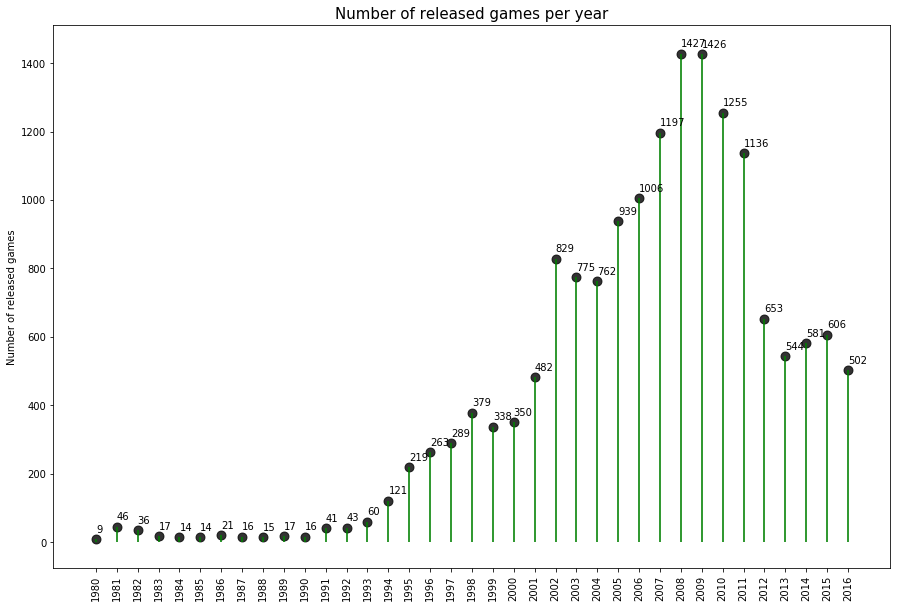

In [23]:
#making a lolipop chart to visualize the number of games released each year
fig,ax = plt.subplots(figsize = (15, 10))
ax.vlines(x = games_per_year.year_of_release, ymin = 0, ymax = games_per_year.name, color = 'green', alpha = 0.8, linewidth = 2)
ax.scatter(x = games_per_year.year_of_release, y = games_per_year.name, s = 80, color = 'black', alpha = 0.8)
ax.set_title('Number of released games per year', fontdict = {'size':15})
ax.set_ylabel('Number of released games')
ax.set_xticks(games_per_year.year_of_release)
ax.set_xticklabels(games_per_year.year_of_release, rotation = 90)

#adding the value of games released each year for every line to the chart
for row in games_per_year.itertuples():
    ax.text(row.year_of_release, row.name + 20, s = round(row.name, 2))

From the plot we can clearly see that there was a rise in number of games released in 2002 and a fall in 2010. 
The first years 1980 - 1993 are pretty in significant in numbers, this industry was just at the beginning , not many games were release that time, not many people could afford this new technology. 

In [24]:
#looking at how sales varied from platform to platform
sales_by_plat = games[['platform', 'total_sales']].groupby(['platform']).sum().sort_values(by = 'total_sales', ascending = False).reset_index()
sales_by_plat

,platform,total_sales
0,PS2,1233.56
1,X360,961.24
2,PS3,931.34
3,Wii,891.18
4,DS,802.78
5,PS,727.58
6,PS4,314.14
7,GBA,312.88
8,PSP,289.53
9,3DS,257.81


We can see that most of the revenue comes from PS2 games as could by suspected from the begining since it's the most popular platform in our dataset. 

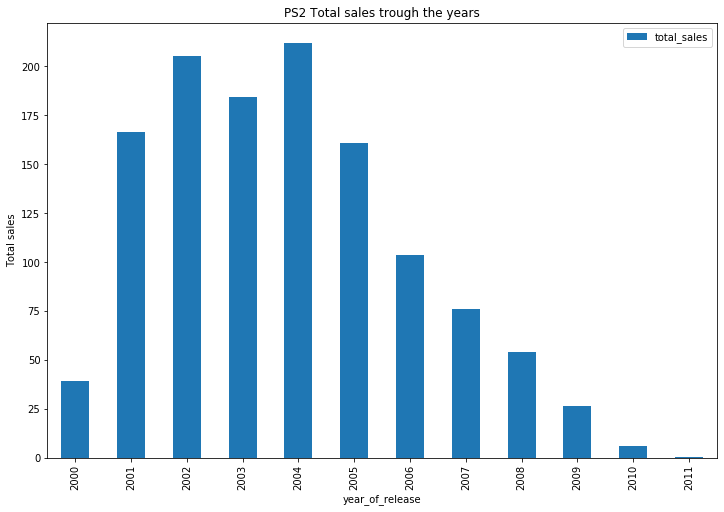

In [25]:
#creating a distribution of the PS2 (the platforms with the greatest total sales) through the years
ps2 = games[games['platform'] == 'PS2']
ps2 = ps2[ps2['year_of_release'] != 0]
ps2_year = ps2[['year_of_release', 'total_sales']].groupby(['year_of_release']).sum().sort_values(by = 'year_of_release').reset_index()
ps2_year.plot.bar(x = 'year_of_release', y = 'total_sales', figsize = (12, 8))
plt.title('PS2 Total sales trough the years')
plt.ylabel('Total sales')
plt.show()

PS2 became a hit within 1 year from 2000 to 2001, and its revanue started to decrease in 2006. 

In [26]:
#looking into how long does it generally take for new platforms to appear and old ones to fade away...
#creating a pivot table that includes the total sales per platform per year
plat_pivot = games.pivot_table(values = 'total_sales', index = 'year_of_release', columns = 'platform', aggfunc = 'sum', fill_value = 0)
plat_pivot.head()


platform,2600,3DO,3DS,DC,DS,GB,GBA,GC,GEN,GG,...,SAT,SCD,SNES,TG16,WS,Wii,WiiU,X360,XB,XOne
year_of_release,,,,,,,,,,,,,,,,,,,,,
1980,11.38,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1981,35.68,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1982,28.88,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1983,5.84,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1984,0.27,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


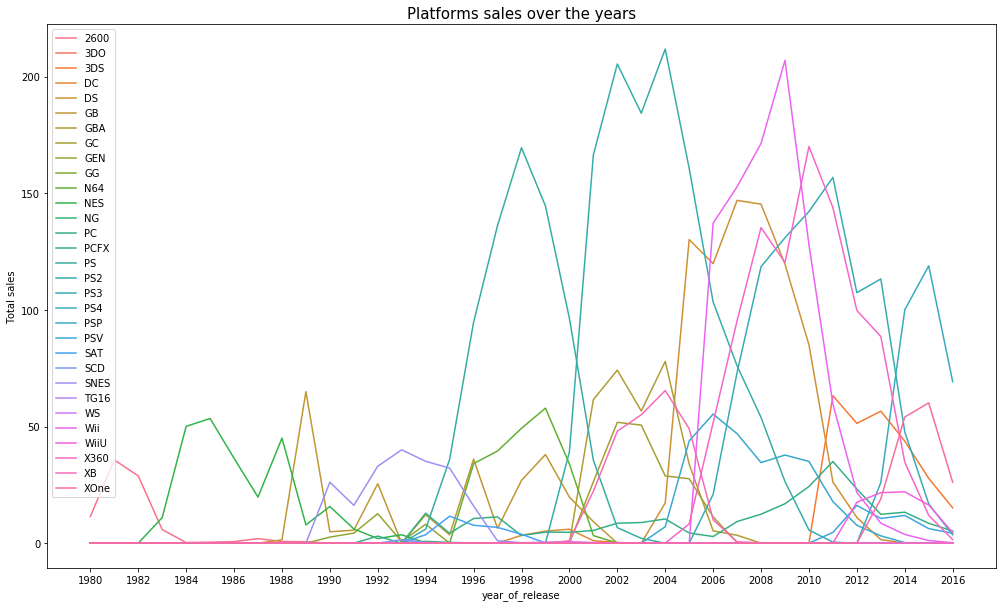

In [27]:
#creating a lineplot for each platform throughout the years of release
plt.figure(figsize = (17, 10))
sns.lineplot(data=plat_pivot, dashes = False)
plt.title('Platforms sales over the years', fontdict = {'size':15})
plt.ylabel('Total sales')
plt.locator_params(axis='x', nbins=len(plat_pivot))

From the chart it looks like it takes a platform 3 - 5 years to fade away. As this industry grow more new platforms emerged in th emarket even before the older ones faded away, there are several platforms active in parallel. 

Since we are looking for the forcast for 2017 and have the data until 2016, assuming our analysis is correct and the "life time" of a platform is ~4 years I will reduce the data set to year_of_release >=2013. 

In [28]:
#reducing the dataset
games_2013 = games[games['year_of_release'] >= 2013]

In [29]:
#looking at how sales varied from platform to platform in the relevant years
sales_by_plat_2013 = games_2013[['platform', 'total_sales']].groupby(['platform']).sum().sort_values(by = 'total_sales', ascending = False).reset_index()
sales_by_plat_2013

,platform,total_sales
0,PS4,314.14
1,PS3,181.43
2,XOne,159.32
3,3DS,143.25
4,X360,136.80
5,WiiU,64.63
6,PC,39.43
7,PSV,32.99
8,Wii,13.66
9,PSP,3.50


We can see that the most profitable platforms in these years are X360, 3DS, XOne, PS3, PS4. 

In [30]:
#reducing the data frame to only the five most profitable platforms
plat = ['X360', '3DS', 'XOne', 'PS3', 'PS4']
games_2013_topplat = games_2013.query('platform in @plat').reset_index()

In [31]:
#creating a pivot table of the relevant years
plat_pivot_2013 = games_2013_topplat.pivot_table(values = 'total_sales', index = 'year_of_release', columns = 'platform', aggfunc = 'sum', fill_value = 0)
plat_pivot_2013


platform,3DS,PS3,PS4,X360,XOne
year_of_release,,,,,
2013,56.57,113.25,25.99,88.58,18.96
2014,43.76,47.76,100.00,34.74,54.07
2015,27.78,16.82,118.90,11.96,60.14
2016,15.14,3.60,69.25,1.52,26.15


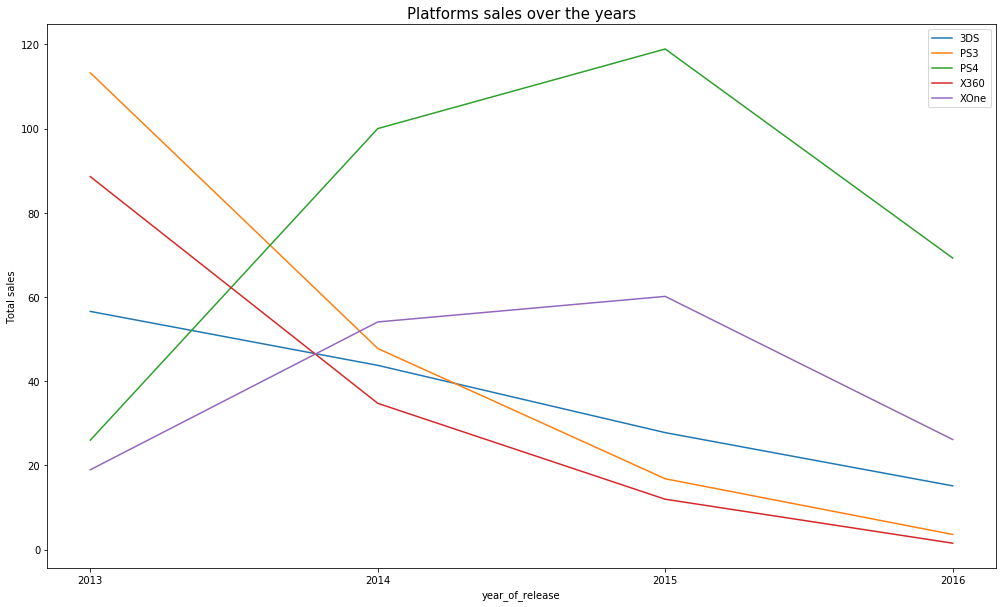

In [32]:
#creating a lineplot for each platform throughout the years of release (>=2013)
plt.figure(figsize = (17, 10))
sns.lineplot(data=plat_pivot_2013, dashes = False)
plt.title('Platforms sales over the years', fontdict = {'size':15})
plt.ylabel('Total sales')
plt.locator_params(axis='x', nbins=len(plat_pivot_2013))

Looking at the most profitable platforms in the past 4 years we can see that they are all shrinking by looking at the slope of the line from 2015 to 2016.
PS3 and X360 sales are almost at 0 revenue in 2016, I can remove them from the most profitable platforms list. 
PS4 and XOne were growing until 2015 but not anymore. 

In [33]:
#reducing the data frame to only the three most profitable platforms
plat = ['3DS', 'XOne', 'PS4']
games_2013_topplat = games_2013.query('platform in @plat').reset_index()

In [34]:
#building a box plot for the global sales of all games, broken down by platform
grouped2013 = games_2013_topplat.groupby(['platform', 'year_of_release'])['total_sales'].sum().reset_index()
grouped2013

,platform,year_of_release,total_sales
0,3DS,2013,56.57
1,3DS,2014,43.76
2,3DS,2015,27.78
3,3DS,2016,15.14
4,PS4,2013,25.99
5,PS4,2014,100.00
6,PS4,2015,118.90
7,PS4,2016,69.25
8,XOne,2013,18.96
9,XOne,2014,54.07


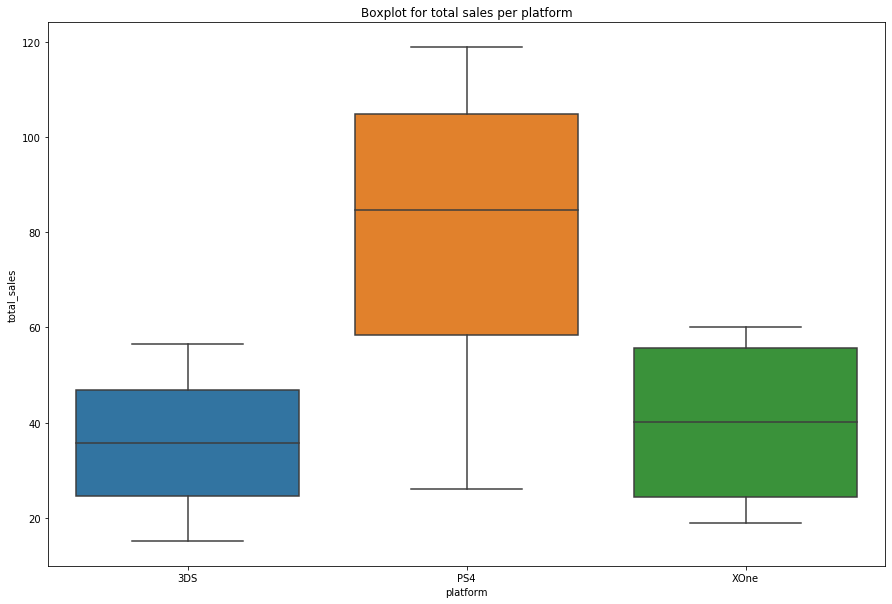

In [35]:
plt.figure(figsize = (15,10))
sns.boxplot(data = grouped2013, x = 'platform', y = 'total_sales')
plt.title('Boxplot for total sales per platform')
plt.show()

From the boxplot we can see that the PS4 was the most profitable platform, as for the rest of the platforms they are pretty much at the same levels. 
when looking at the averages we can see that difference between XOne and 3DS is not significant. 

In [36]:
ps4 = games_2013_topplat[games_2013_topplat['platform']=='PS4'][['total_sales', 'critic_score', 'user_score']]

ps4

,total_sales,critic_score,user_score
0,14.63,NaN,NaN
2,12.62,97.0,8.3
4,8.58,82.0,4.3
5,7.98,NaN,NaN
6,7.66,83.0,5.7
...,...,...,...
914,0.01,69.0,7.5
916,0.01,NaN,NaN
920,0.01,61.0,7.9
921,0.01,51.0,5.5


In [37]:
#looking on the affect of user and professional reviews on the sales 
#creating a function to generate a scatter plot and calculate the pearson correlation coefficient between the score and sales

def score_affect(platform, score):
    data = games_2013_topplat[games_2013_topplat['platform'] == platform][['total_sales', score]]
    #build a scatter plot
    plt.scatter(data = data, x = score, y = 'total_sales')
    plt.title('Connection between game score to total sales')
    plt.xlabel('Score')
    plt.ylabel('Total sales')
    #calculate correlation
    cor = data.corr(method = 'pearson')   
    if cor.iloc[0][1] >= 0.7:
        print('Positive & strong correlation between the score to the total sales')
    else:
        print('Weak correlation between the score and the total sales')
    print('Correlation coefficient is: {}'.format(cor.iloc[0][1]))



Weak correlation between the score and the total sales
Correlation coefficient is: 0.40656790206178123


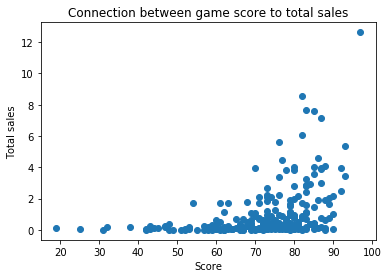

In [38]:
score_affect('PS4', 'critic_score')

Weak correlation between the score and the total sales
Correlation coefficient is: -0.03195711020455685


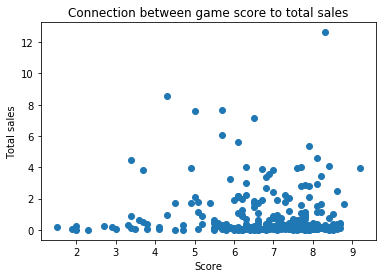

In [39]:
score_affect('PS4', 'user_score')

When looking at the PS4 platform it looks like there's a weak connection between the critic scores to the sales and a really weak and negetive connection between the user score the the sales. 
Though we have to remember that we have a lot of missing data for these values (user score & critic score), I didn't want to fill in these values so I won't cause a distortion in the data. It is very important to pay attention to these missing values while collecting the data. 

Weak correlation between the score and the total sales
Correlation coefficient is: 0.4169983280084019


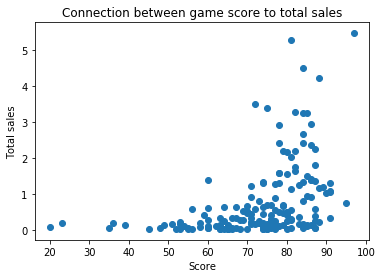

In [40]:
#looking on the same connection for other platforms
#XOne - critic score & sales
score_affect('XOne', 'critic_score')

Weak correlation between the score and the total sales
Correlation coefficient is: -0.06892505328279544


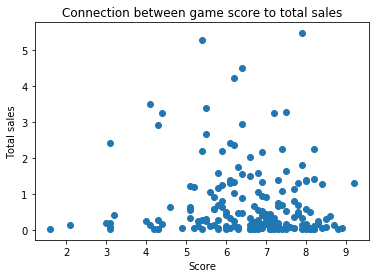

In [41]:
#XOne - user score & sales
score_affect('XOne', 'user_score')

Weak correlation between the score and the total sales
Correlation coefficient is: 0.35705661422880974


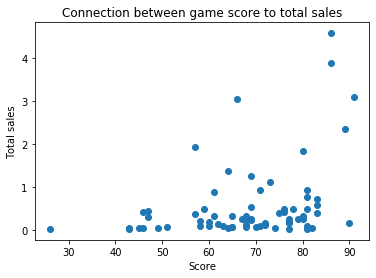

In [42]:
#looking on the same connection for other platforms
#3DS - critic score & sales
score_affect('3DS', 'critic_score')

Weak correlation between the score and the total sales
Correlation coefficient is: 0.24150411773562971


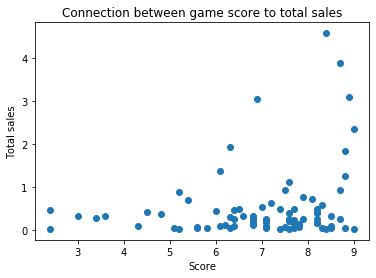

In [43]:
#3DS - user score & sales
score_affect('3DS', 'user_score')

We can see that in all profitable platforms we see a weak connection between the scores to the sales, as I mention earlier this might be since we are missing a great share of data for these parameters. 
Additional thing we can notice is that the correlation between the critic score to the sales is stronger then the correlation between the user score to the sales, for all the platforms above, this makes sense since people usually look at the professional critic before they decide if to buy the product or not, sometimes we take it more seriously than looking at our fellow users' critic. 

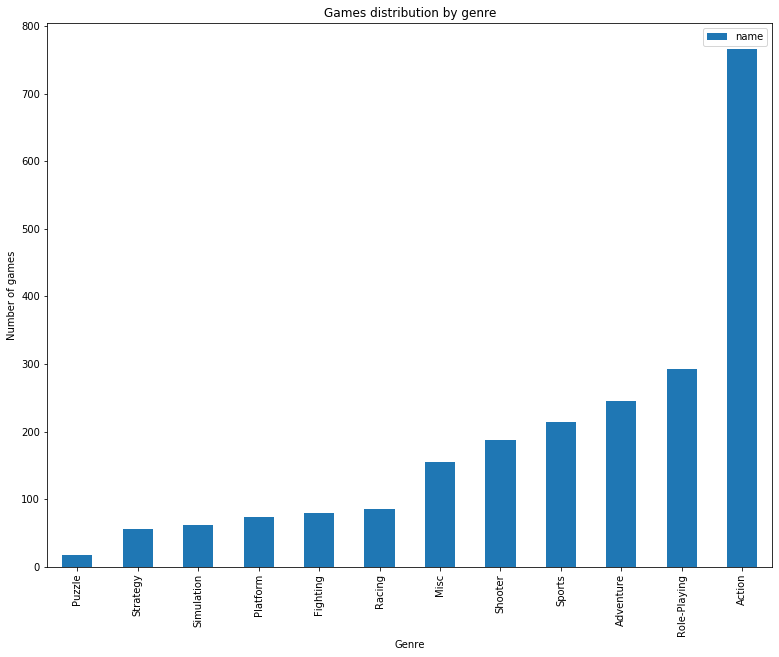

In [44]:
#looking at the distribution of games by genre, I will use the data set with all the platforms in the years 2013 and above
name_group_genre = games_2013[['genre', 'name']].groupby(['genre']).count().sort_values(by = 'name').reset_index()
                                                                               
name_group_genre.plot.bar(x = 'genre',y= 'name', figsize = (13,10))
plt.title('Games distribution by genre')
plt.ylabel('Number of games')
plt.xlabel('Genre')
plt.show()


There are mostly action games (followed by Role playing and Adveture) released in the years we analyze. 
In order to learn about the profits of the genres we will look into the total sales of each genre. 

In [45]:
#looking at how sales varied from genre to genre 
games_genre = games_2013[['genre', 'total_sales']].groupby(['genre']).sum().sort_values(by = 'total_sales', ascending = False).reset_index()
games_genre

,genre,total_sales
0,Action,321.87
1,Shooter,232.98
2,Sports,150.65
3,Role-Playing,145.89
4,Misc,62.82
5,Platform,42.63
6,Racing,39.89
7,Fighting,35.31
8,Adventure,23.64
9,Simulation,21.76


When looking at the revenue we can see that Action genre is the most profitable game genre in the market, which is align with the fact that a great share of the games released are from the action genre. 
We can see that the Adventure genre that was the third on number of games is actually the eigth in profits, maybe each game from the genre is cheaper than other genres or it doesn't have as many fans as it's thought.

The games with the least profit are from genres that require a lot of thought into the game - Strategy, Puzzle, Simulation, probably not many people play these games, it's for a very unique crowd. 

**Create a user profile for each region**

,platform,na_sales,market_share [%]
4,PS4,108.74,24.842933
10,XOne,93.12,21.274360
9,X360,81.66,18.656188
3,PS3,63.50,14.507322
0,3DS,38.20,8.727239


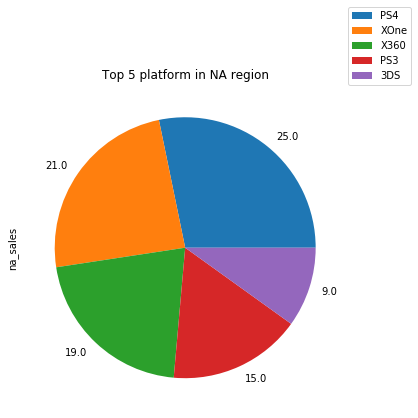

In [46]:
# Looking at the top 5 platforms for each region
#NA
na_platform = games_2013.groupby(['platform'])['na_sales'].sum().reset_index().sort_values(by = 'na_sales', ascending = False)
na_platform ['market_share [%]'] = (na_platform['na_sales'] / na_platform['na_sales'].sum())*100
display(na_platform.head())
na_platform[na_platform['market_share [%]'] > 8].plot.pie(y = 'na_sales', figsize = (8,6), labels = round(na_platform['market_share [%]']))
plt.legend(na_platform['platform'], loc = (1,1))
plt.title('Top 5 platform in NA region')
plt.show()

,platform,jp_sales,market_share [%]
0,3DS,67.81,48.167353
3,PS3,23.35,16.586163
6,PSV,18.59,13.205001
4,PS4,15.96,11.336838
8,WiiU,10.88,7.728371


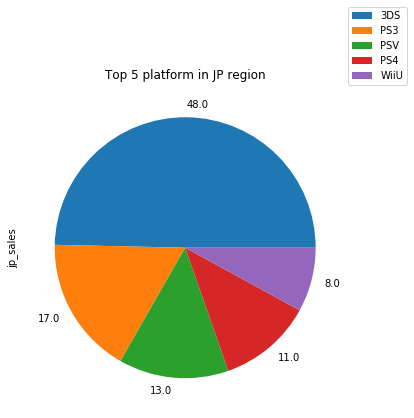

In [47]:
# Looking at the top 5 platforms for each region
#JP
jp_platform = games_2013.groupby(['platform'])['jp_sales'].sum().reset_index().sort_values(by = 'jp_sales', ascending = False)
jp_platform ['market_share [%]'] = (jp_platform['jp_sales'] / jp_platform['jp_sales'].sum())*100
display(jp_platform.head())
jp_platform[jp_platform['market_share [%]'] > 7.7].plot.pie(y = 'jp_sales', figsize = (8,6), labels = round(jp_platform['market_share [%]']))
plt.legend(jp_platform['platform'], loc = (1,1))
plt.title('Top 5 platform in JP region')
plt.show()

,platform,eu_sales,market_share [%]
4,PS4,141.09,35.971241
3,PS3,67.81,17.288326
10,XOne,51.59,13.152997
9,X360,42.52,10.840578
0,3DS,30.96,7.893328


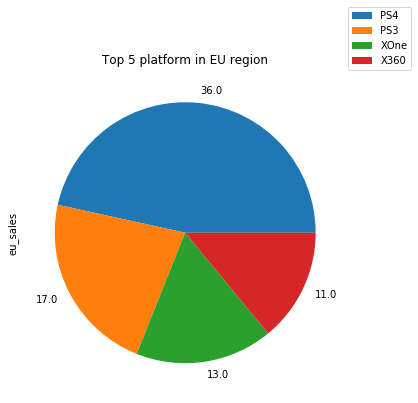

In [48]:
# Looking at the top 5 platforms for each region
#EU
eu_platform = games_2013.groupby(['platform'])['eu_sales'].sum().reset_index().sort_values(by = 'eu_sales', ascending = False)
eu_platform ['market_share [%]'] = (eu_platform['eu_sales'] / eu_platform['eu_sales'].sum())*100
display(eu_platform.head())
eu_platform[eu_platform['market_share [%]'] > 8].plot.pie(y = 'eu_sales', figsize = (8,6), labels = round(eu_platform['market_share [%]']))
plt.legend(eu_platform['platform'], loc = (1,1))
plt.title('Top 5 platform in EU region')
plt.show()

We can see that the top 5 platforms for JP region are different from EU & NA (with are the same in a different order). The most profitable platform in JP which holds almost 50% of the market shares is 3DS which is the least profitable (out of the 5) in the EU and NA, this region is playing using deifferent platforms when compared to NA and EU. 
This should be taken into account when launcing a game in the JP market. 

In [49]:
# Looking at the top 5 genres for each region
#NA
na_genres = games_2013.groupby(['genre'])['na_sales'].sum().reset_index().sort_values(by = 'na_sales', ascending = False)
na_genres ['market_share [%]'] = (na_genres['na_sales'] / na_genres['na_sales'].sum())*100
na_genres.head()

,genre,na_sales,market_share [%]
0,Action,126.05,28.797606
8,Shooter,109.74,25.071394
10,Sports,65.27,14.911700
7,Role-Playing,46.40,10.600626
3,Misc,27.49,6.280414


In [50]:
# Looking at the top 5 genres for each region
#JP
jp_genres = games_2013.groupby(['genre'])['jp_sales'].sum().reset_index().sort_values(by = 'jp_sales', ascending = False)
jp_genres ['market_share [%]'] = (jp_genres['jp_sales'] / jp_genres['jp_sales'].sum())*100
jp_genres.head()

,genre,jp_sales,market_share [%]
7,Role-Playing,51.04,36.255150
0,Action,40.49,28.761188
3,Misc,9.20,6.535019
2,Fighting,7.65,5.434011
8,Shooter,6.61,4.695269


In [51]:
# Looking at the top 5 genres for each region
#EU
eu_genres = games_2013.groupby(['genre'])['eu_sales'].sum().reset_index().sort_values(by = 'eu_sales', ascending = False)
eu_genres ['market_share [%]'] = (eu_genres['eu_sales'] / eu_genres['eu_sales'].sum())*100
eu_genres.head()

,genre,eu_sales,market_share [%]
0,Action,118.13,30.117533
8,Shooter,87.86,22.400122
10,Sports,60.52,15.429722
7,Role-Playing,36.97,9.425592
6,Racing,20.19,5.147490


When looking at the top 5 genres in each region, we can again notice the the EU and NA markets are pretty similar, their top 4 are the same and only the fifth place is different. Also, their market shares for each genre is pretty similar. 
The JP market seems different in general, the first place is different (Role playing) with a market shares of 36% which is significant. 

Again, we learn that the JP market is unique when compared to EU and NA. 

In [52]:
# Looking at the ERBS rating and their affect on sales for each region
#NA
na_erbs = games_2013.groupby(['rating'])['na_sales'].sum().reset_index().sort_values(by = 'na_sales', ascending = False)
na_erbs ['market_share [%]'] = (na_erbs['na_sales'] / na_erbs['na_sales'].sum())*100
na_erbs.head()

,rating,na_sales,market_share [%]
2,M,165.21,37.744169
4,unknown,89.42,20.429051
0,E,79.05,18.059903
1,E10+,54.24,12.391766
3,T,49.79,11.375111


In [53]:
# Looking at the ERBS rating and their affect on sales for each region
#JP
jp_erbs = games_2013.groupby(['rating'])['jp_sales'].sum().reset_index().sort_values(by = 'jp_sales', ascending = False)
jp_erbs ['market_share [%]'] = (jp_erbs ['jp_sales'] / jp_erbs ['jp_sales'].sum())*100
jp_erbs.head()

,rating,jp_sales,market_share [%]
4,unknown,85.05,60.413411
3,T,20.59,14.625657
0,E,15.14,10.754369
2,M,14.11,10.022731
1,E10+,5.89,4.183833


In [54]:
# Looking at the ERBS rating and their affect on sales for each region
#EU
eu_erbs = games_2013.groupby(['rating'])['eu_sales'].sum().reset_index().sort_values(by = 'eu_sales', ascending = False)
eu_erbs ['market_share [%]'] = (eu_erbs['eu_sales'] / eu_erbs['eu_sales'].sum())*100
eu_erbs.head()

,rating,eu_sales,market_share [%]
2,M,145.32,37.049690
0,E,83.36,21.252836
4,unknown,78.91,20.118298
1,E10+,42.69,10.883920
3,T,41.95,10.695255


Here as well we can see that  the JP market is different, it has the same top 4 ratings but in a deifferent order. While the EU and NA market are identical in the 4 top ratings.

For all the regions we can see that the first rating holds 40-50 % of the market shares. 


## Hypotheses testing

<b>Platforms </b>

Testing the hypothesis that average user ratings of the Xbox One and PC platforms are the same.
This will be tested using two-sided t-test. 

The Null hypothesis is that the average user ratings of the Xbox One equal to the average user ratings of the PC platforms.

The alternative hypothesis is that they are different. 

I choose a significance level of alpha = 0.05, since it's a commonly used level and it suits this testing. 

In [55]:
#create a function to check for equal variance and perform t-test
def t_test(sample1,sample2,alpha=0.05):
    p_value_levene=stats.levene(sample1, sample2).pvalue.astype(int)
    if p_value_levene<alpha:
        equal_v=False
    else:
        equal_v=True
    p_value=stats.ttest_ind(sample1, sample2,nan_policy='omit',equal_var=equal_v).pvalue.astype(int)
    if p_value<alpha:
        print('Reject H0: average of sample1 is not equal to average of sample2')
    else:
        print( "Fail to Reject H0: We don't have enough evidence to say that averages of sample1 \
  and sample2 are not the same")

In [56]:
# devide the data to 2 groups with user_score column only
XOne_score = games_2013[games_2013['platform']=='XOne']['user_score']
PC_score = games_2013[games_2013['platform']=='PC']['user_score']

In [57]:
#use the function to perform a t-test on the mean user_score of each platform
t_test(XOne_score, PC_score)

Reject H0: average of sample1 is not equal to average of sample2


We can reject the null hypothesis. The mean user score for the Xbox One is not equal to the mean user score of PC platform. 

<b>Genres</b>

Testing the hypothesis that the average user ratings for the Action and Sports genres are different.
This will be tested using two-sided t-test. 

The Null hypothesis is that the average user ratings of the Sction genre equals to the average user ratings of the Sports genre.

The alternative hypothesis is that they are different. 

I choose a significance level of alpha = 0.05, since it's a commonly used level and it suits this testing. 

In [58]:
# devide the data to 2 groups with user_score column only
action_score = games_2013[games_2013['genre']=='Action']['user_score']
sports_score = games_2013[games_2013['genre']=='Sports']['user_score']

In [59]:
#use the function to perform a t-test on the mean user_score of each platform
t_test(action_score, sports_score)

Reject H0: average of sample1 is not equal to average of sample2


We can reject the null hypothesis. The mean user score for the Action genre is not equal to the mean user score of the Sports genre. 

## Conclusions 

For this project I receive a data set of video games sold in different regions in the world (NA, EU, JP, Other) which included the revenue of each game, the platform in use, the game genre and rating (critic score, user score and ERBS). 

The data set included 16,715 row, with missing values mainly in the rating columns (critic score, user score and ERBS), even though the missing data was a significant amount of rows I chose not to fill in this rows since I might be distorting the dataset. These ratings might influence my later on analysis, and for the next time it is worth taking more time and effort into filling in this data properly. 
I changed the type for year_of_relese (to int) and user_score (to float) which is more suitable for the data they present. 
For user_score I needed to remove the 'tbd' values for this change which is reasonable since 'tbd' didn't have any added value for my analysis. 

I generated a new column "total_sales" which summed up the sales across all regions. 

As part of the data analysis I looked into several intresting details: 
1. Number of games released by year - we could see that the greatest hype in video games selling was in the years of 2002 - 2010, which could be explained by the mobile games that captured some of the video games audiance. 
2. The total revenue by platform - the most selling platform along the years was PS2, which is also the platform with the most games released in these years. It became popular within 1 year (2000 to 2001) and started fading away 4 years later (2005 - 2006).
3. The lifetime of a platform - we saw that the golden years of a platform is 3-5 years so we could minimize our dataset to 2013-2016 in order to create a forecast for 2017. 
4. In these years (2013 - 2016) the most profitable platforms were - X360, 3DS, XOne, PS3 and PS4.Yet, looking deeper into the numbers we can see that all of these platforms are in a downhill slope of revenues in (at least) the last year. I further reduced the data to top 3 platforms 3DS, PS3 and XOne (since the other two already reached 0 revenue in 2016). Maybe it's time for a new platform to emerge (PS5 maybe..).
5. In these years (2013 - 2016) among the most profitable platforms we can see that PS4 was the most profitable one, as for the rest of the platforms they are pretty much at the same levels.
6. I created a function that generates a scatter plot of the connection between sales and ratings (critic score, user score) and calculated the correlation between them. In all profitable platforms I saw a weak connection between the scores to the sales, as I mentioned earlier this might be since we are missing a great share of data for these parameters. Additional thing I noticed is that the correlation between the critic score to the sales is stronger then the correlation between the user score to the sales, for all the platforms above, this makes sense since people usually look at the professional critic before they decide if to buy the product or not, sometimes we take it more seriously than looking at our fellow users' critic. 
7. The most popular genre is the Action games. Also, when looking at profits it's the most profitable, but not by much compared to Shooter genre which was in the fifth place, maybe we need to increase the fee for action games. As for the When looking at games with the least profit - Strategy, Puzzle, Simulation, these are genres that require a lot of thought into the game, probably not many people play these games, it's for a very unique crowd. 


I created a user profile for each region and investigated the different platforms, genres and rating in each region, their similarity and differences. I noticed that for the Japan market the platforms they use are somehow differet from the ones in EU and NA and their favorite genre is Role-playing while for the EU and NA market it's Action games that role the market. 
As for the ratings, this was actually pretty similar between the regions and that the market is divided to the same 4 ratings (E, M, T, E10+) and the first rating holds almost half of the market shares. 

For the end of my analysis I performed a t-test to investigate the similarity between user scores average in different platforms (Xbox One and PC) and user scores average in diferrent genres (Action and Sports) , in both cases the null hypothesis was rejected and the conclusion was that the user score avergae in these platforms and in these genres are not equal. 

My recommendations to the company are: 

1. Release games for the most profitable platforms (3DS, XOne and PS4). 
2. Focus on games in the genres: Action and Shooter (worldwide) and Role- playing (for JP Market).
3. Pay attention to the JP market, since it's quite different in the aspects of favorite genres and popular platforms. 

